# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-221-MIA-rep1_CRR_DiadFit,103.022851,0.007236,1286.386294,0.005981,234.250284,1286.386344,265.715608,0.510961,2.065482,...,1.043478,0.050156,0.004363,1.247148,1.269231,0.218256,0.002268,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-221-MIA-rep2_CRR_DiadFit,103.036749,0.021717,1286.379029,0.018068,210.943466,1286.379029,244.960180,0.514771,2.316428,...,1.192308,0.183847,0.004881,1.250980,1.293578,0.212186,0.002459,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-221-MIA-rep3,103.008285,0.009965,1286.404228,0.008198,189.285284,1286.404228,214.718680,0.496915,2.444897,...,1.009592,0.006023,0.005250,1.242424,1.261765,0.213933,0.002994,PseudoVoigtModel,PseudoVoigtModel,No
3,187-9-221-FIA,103.595023,0.019310,1285.023658,0.016387,102.292462,1285.023658,226.375874,0.800664,1.894610,...,1.115806,0.073263,0.015654,1.100796,1.047081,0.131685,0.006549,PseudoVoigtModel,PseudoVoigtModel,No
4,187-9-221-FIB,103.253800,0.104833,1285.624984,0.084267,18.378153,1285.624984,35.283824,0.611116,1.558196,...,1.080357,0.088766,0.066505,1.176271,1.130326,0.170307,0.027998,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [5]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','broad','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'04 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [6]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 40/40 [00:00<00:00, 63.07it/s]


Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 25, 2024\n",August,25.0,6.045,45.0,5.0,50.0,"['0h', '3m', '47s']",2:36:54 PM\n,52614.0,1324.964
1,187-9-221-MIA-rep1.txt,"August 25, 2024\n",August,25.0,11.937,60.0,4.0,50.0,"['0h', '4m', '2s']",2:50:49 PM\n,53449.0,1324.964
2,187-9-221-MIA-rep2.txt,"August 25, 2024\n",August,25.0,11.863,60.0,4.0,50.0,"['0h', '4m', '1s']",2:56:01 PM\n,53761.0,1324.964
3,187-9-221-MIA-rep3.txt,"August 25, 2024\n",August,25.0,11.824,60.0,4.0,50.0,"['0h', '4m', '1s']",3:01:49 PM\n,54109.0,1324.964
4,187-9-221-FIA.txt,"August 25, 2024\n",August,25.0,6.045,60.0,4.0,50.0,"['0h', '4m', '1s']",3:07:00 PM\n,54420.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [7]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [8]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '187-9-221-MIA-rep1', '187-9-221-MIA-rep2',
       '187-9-221-MIA-rep3', '187-9-221-FIA', '187-9-221-FIB',
       '187-9-222-FIA', '187-9-224-MIA-rep1', '187-9-224-MIA-rep2',
       '187-9-224-MIA-rep3', '187-9-219-MIA-rep1', '187-9-219-MIA-rep2',
       '187-9-219-MIA-rep3', '187-9-223-FIA', 'FG04-A1-4-end'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [9]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-221-MIA-rep1


In [10]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-221-MIA-rep1', '187-9-221-MIA-rep2', '187-9-221-MIA-rep3',
       '187-9-221-FIA', '187-9-221-FIB', '187-9-224-MIA-rep1',
       '187-9-224-MIA-rep2', '187-9-224-MIA-rep3', '187-9-219-MIA-rep1',
       '187-9-219-MIA-rep2', '187-9-219-MIA-rep3', '187-9-223-FIA',
       '187-9-222-FIA', 'FG04-A1-4-start', 'FG04-A1-4-end'], dtype='<U18')

In [11]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-221-MIA-rep1,103.022851,0.007236,1286.386294,0.005981,234.250284,1286.386344,265.715608,0.510961,2.065482,...,August,25.0,11.937,60.0,4.0,50.0,"['0h', '4m', '2s']",2:50:49 PM\n,53449.0,1324.964
1,187-9-221-MIA-rep2,103.036749,0.021717,1286.379029,0.018068,210.943466,1286.379029,244.960180,0.514771,2.316428,...,August,25.0,11.863,60.0,4.0,50.0,"['0h', '4m', '1s']",2:56:01 PM\n,53761.0,1324.964
2,187-9-221-MIA-rep3,103.008285,0.009965,1286.404228,0.008198,189.285284,1286.404228,214.718680,0.496915,2.444897,...,August,25.0,11.824,60.0,4.0,50.0,"['0h', '4m', '1s']",3:01:49 PM\n,54109.0,1324.964
3,187-9-221-FIA,103.595023,0.019310,1285.023658,0.016387,102.292462,1285.023658,226.375874,0.800664,1.894610,...,August,25.0,6.045,60.0,4.0,50.0,"['0h', '4m', '1s']",3:07:00 PM\n,54420.0,1324.964
4,187-9-221-FIB,103.253800,0.104833,1285.624984,0.084267,18.378153,1285.624984,35.283824,0.611116,1.558196,...,August,25.0,6.095,60.0,4.0,50.0,"['0h', '4m', '1s']",3:12:59 PM\n,54779.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [12]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [13]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.052838529249724e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-221-MIA-rep1,0.024468,0.004847,0.002875,0.003902,102.812007,0.007257,0.000718,0.007236,11.937,...,53449.0,NaN,NaN,NaN,NaN,NaN,53449.0,0.997953,0.997946,0.997960
1,187-9-221-MIA-rep2,0.029946,0.009430,0.008592,0.003886,102.825831,0.021684,0.000714,0.021717,11.863,...,53761.0,NaN,NaN,NaN,NaN,NaN,53761.0,0.997953,0.997946,0.997960
2,187-9-221-MIA-rep3,0.018671,0.005567,0.003951,0.003922,102.797375,0.009970,0.000710,0.009965,11.824,...,54109.0,NaN,NaN,NaN,NaN,NaN,54109.0,0.997952,0.997946,0.997959
3,187-9-221-FIA,0.257695,0.008389,0.008051,0.002357,103.382867,0.019283,0.000711,0.019310,6.045,...,54420.0,1097.044257,104.371619,12.63429,Spline,0.179184,54420.0,0.997952,0.997945,0.997959
4,187-9-221-FIB,0.115716,0.041631,0.041455,0.003821,103.042291,0.104621,0.000706,0.104833,6.095,...,54779.0,NaN,NaN,NaN,NaN,NaN,54779.0,0.997952,0.997945,0.997958


In [15]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.052838529249724e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-221-MIA-rep1,0.024468,0.004847,0.002875,0.003902,102.812007,0.007257,0.000718,0.007236,11.937,...,53449.0,NaN,NaN,NaN,NaN,NaN,53449.0,0.997953,0.997946,0.997960
1,187-9-221-MIA-rep2,0.029946,0.009430,0.008592,0.003886,102.825831,0.021684,0.000714,0.021717,11.863,...,53761.0,NaN,NaN,NaN,NaN,NaN,53761.0,0.997953,0.997946,0.997960
2,187-9-221-MIA-rep3,0.018671,0.005567,0.003951,0.003922,102.797375,0.009970,0.000710,0.009965,11.824,...,54109.0,NaN,NaN,NaN,NaN,NaN,54109.0,0.997952,0.997946,0.997959
3,187-9-221-FIA,0.257695,0.008389,0.008051,0.002357,103.382867,0.019283,0.000711,0.019310,6.045,...,54420.0,1097.044257,104.371619,12.63429,Spline,0.179184,54420.0,0.997952,0.997945,0.997959
4,187-9-221-FIB,0.115716,0.041631,0.041455,0.003821,103.042291,0.104621,0.000706,0.104833,6.095,...,54779.0,NaN,NaN,NaN,NaN,NaN,54779.0,0.997952,0.997945,0.997958


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [16]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 25, 2024_fitted_2024-08-26.xlsx


## This helps visualize the errors on each spectra 

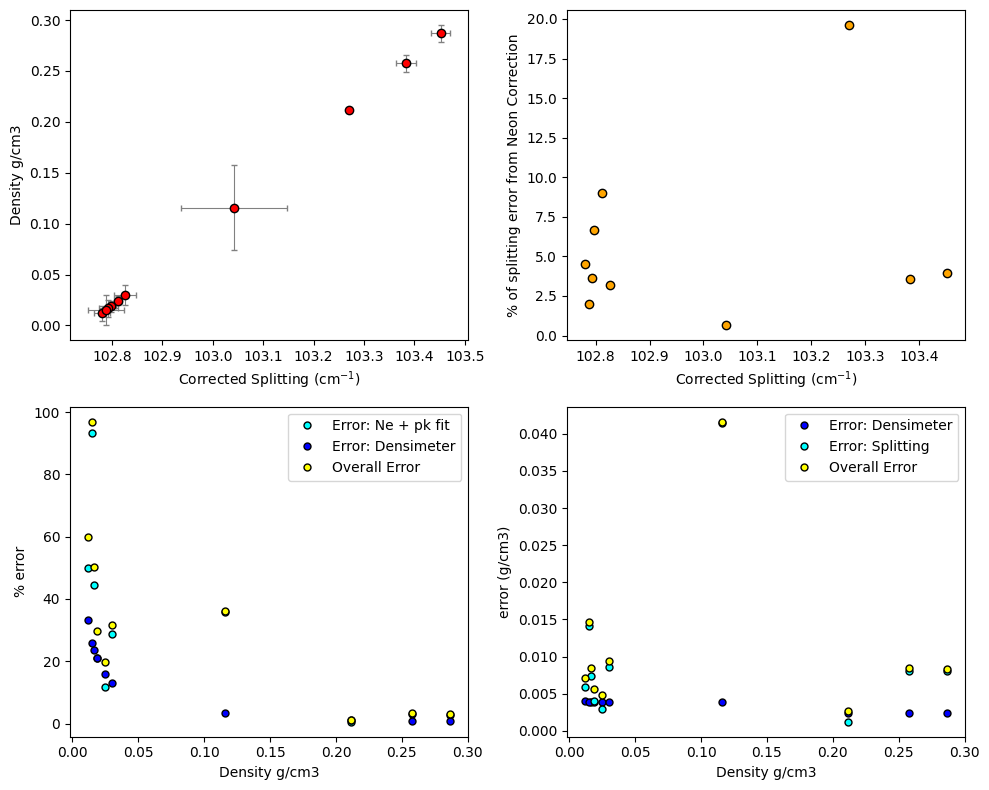

In [17]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [18]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-221-MIA-rep1,0.024468,0.004847,0.002875,0.003902,102.812007,0.007257,0.000718,0.007236,11.937,...,53449.0,NaN,NaN,NaN,NaN,NaN,53449.0,0.997953,0.997946,0.997960
1,187-9-221-MIA-rep2,0.029946,0.009430,0.008592,0.003886,102.825831,0.021684,0.000714,0.021717,11.863,...,53761.0,NaN,NaN,NaN,NaN,NaN,53761.0,0.997953,0.997946,0.997960
2,187-9-221-MIA-rep3,0.018671,0.005567,0.003951,0.003922,102.797375,0.009970,0.000710,0.009965,11.824,...,54109.0,NaN,NaN,NaN,NaN,NaN,54109.0,0.997952,0.997946,0.997959
3,187-9-221-FIA,0.257695,0.008389,0.008051,0.002357,103.382867,0.019283,0.000711,0.019310,6.045,...,54420.0,1097.044257,104.371619,12.634290,Spline,0.179184,54420.0,0.997952,0.997945,0.997959
4,187-9-221-FIB,0.115716,0.041631,0.041455,0.003821,103.042291,0.104621,0.000706,0.104833,6.095,...,54779.0,NaN,NaN,NaN,NaN,NaN,54779.0,0.997952,0.997945,0.997958
12,187-9-222-FIA,0.211207,0.002658,0.001214,0.002365,103.270599,0.002955,0.000702,0.002877,5.957,...,56188.0,NaN,NaN,NaN,NaN,NaN,56188.0,0.997950,0.997943,0.997956
5,187-9-224-MIA-rep1,0.011886,0.007130,0.005939,0.003946,102.780254,0.014988,0.000708,0.015002,11.880,...,58253.0,NaN,NaN,NaN,NaN,NaN,58253.0,0.997947,0.997940,0.997954
6,187-9-224-MIA-rep2,0.016702,0.008397,0.007421,0.003928,102.792407,0.018729,0.000710,0.018754,11.885,...,58506.0,NaN,NaN,NaN,NaN,NaN,58506.0,0.997946,0.997939,0.997953
8,187-9-219-MIA-rep1,0.015148,0.014679,0.014142,0.003934,102.788484,0.035690,0.000731,0.035756,11.956,...,60074.0,1097.093688,259.050270,19.125749,Spline,2.078668,60074.0,0.997944,0.997937,0.997951
11,187-9-223-FIA,0.286771,0.008327,0.007987,0.002353,103.452129,0.018921,0.000775,0.018945,6.007,...,62001.0,NaN,NaN,NaN,NaN,NaN,62001.0,0.997941,0.997934,0.997949


In [19]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-221-MIA-rep1,0.024468,0.004847,0.002875,0.003902,102.812007,0.007257,0.000718,0.007236,11.937,...,53449.0,NaN,NaN,NaN,NaN,NaN,53449.0,0.997953,0.997946,0.997960
1,187-9-221-MIA-rep2,0.029946,0.009430,0.008592,0.003886,102.825831,0.021684,0.000714,0.021717,11.863,...,53761.0,NaN,NaN,NaN,NaN,NaN,53761.0,0.997953,0.997946,0.997960
2,187-9-221-MIA-rep3,0.018671,0.005567,0.003951,0.003922,102.797375,0.009970,0.000710,0.009965,11.824,...,54109.0,NaN,NaN,NaN,NaN,NaN,54109.0,0.997952,0.997946,0.997959
5,187-9-224-MIA-rep1,0.011886,0.007130,0.005939,0.003946,102.780254,0.014988,0.000708,0.015002,11.880,...,58253.0,NaN,NaN,NaN,NaN,NaN,58253.0,0.997947,0.997940,0.997954
6,187-9-224-MIA-rep2,0.016702,0.008397,0.007421,0.003928,102.792407,0.018729,0.000710,0.018754,11.885,...,58506.0,NaN,NaN,NaN,NaN,NaN,58506.0,0.997946,0.997939,0.997953
8,187-9-219-MIA-rep1,0.015148,0.014679,0.014142,0.003934,102.788484,0.035690,0.000731,0.035756,11.956,...,60074.0,1097.093688,259.05027,19.125749,Spline,2.078668,60074.0,0.997944,0.997937,0.997951


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

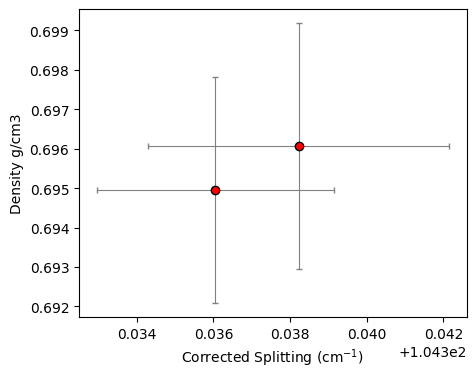

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [21]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

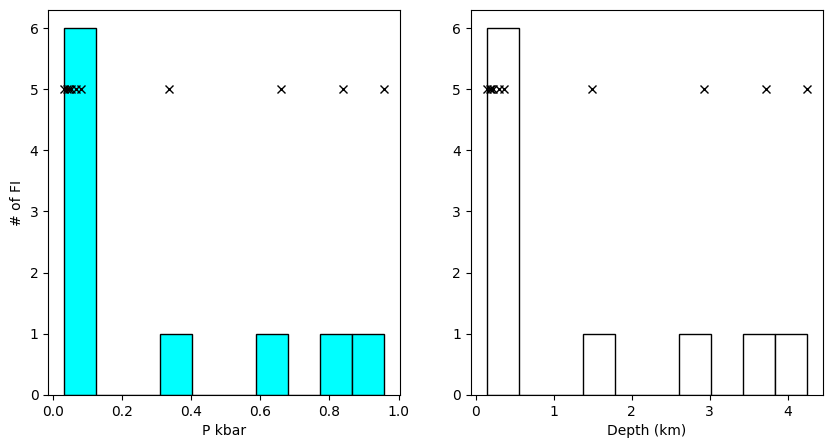

In [22]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')